<a href="https://colab.research.google.com/github/Vinayak-Sharma12/LangGraph/blob/main/4_Integrate_Tools_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEPS TO INTEGRATE TOOLS WITH LangGraph**


1.  CREATE STATE
2.  CREATE TOOL
3.  BIND TOOL WITH LLM
4.  CREATE A NODE OF LLM_WITH_TOOL(state:State)
5.  Add Tool(as Node) to Graph Using ToolNode ==> name your always as tools
5.  Add TOOL EDGE as Conditional Edge using tools_condition





In [9]:
!pip install -q langgraph langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 5.5 MB/s eta 0:00:00


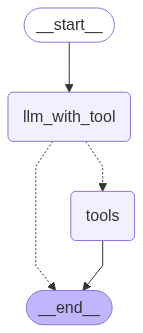

In [27]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

### **STATE**

In [35]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph import add_messages

In [36]:
class State(TypedDict):
  messages:Annotated[list,add_messages] #Annotated basically labels the message as AI or Human
                                        # add_messages appends message in the list


### **TOOL**

In [38]:
def add(a:int,b:int)->int:
  """Adds two number"""
  return a+b

## **BINDING TOOL WITH LLM**

In [39]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.1-8b-instant",api_key='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')

In [40]:
llm_with_tool=llm.bind_tools([add])

## **CREATE NODE(FOR llm_with_tool)**

In [48]:
def llm_tool(state:State):
  return {"messages":llm_with_tool.invoke(state['messages'])}

## **GRAPH**

tools_conditions=> return tools or END (so name your node as tools)



In [49]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition

builder=StateGraph(State)

#ADD NODE
builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode([add])) #Adding Tool to the Graph

#ADD EDGES
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges("llm_tool",tools_condition) # tools_condition checks the latest message
                                                                # if it is tool call it routes to tool
                                                                # else route to end
builder.add_edge("tools",END)

#Compile
graph=builder.compile()


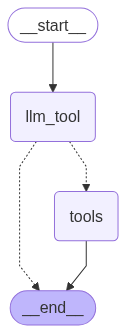

In [50]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [58]:
result=graph.invoke({"messages":"What is 2 plus 9 "})
print(result)

{'messages': [HumanMessage(content='What is 2 plus 9 ', additional_kwargs={}, response_metadata={}, id='84884d44-c4b9-4e51-aebd-84bd413e6314'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ertn', 'function': {'arguments': '{"a": 2, "b": 9}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 220, 'total_tokens': 238, 'completion_time': 0.024, 'prompt_time': 0.040556018, 'queue_time': 0.6155381670000001, 'total_time': 0.064556018}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8d1c73bd4c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ab277f91-f599-4faf-be33-0cda01c76150-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 9}, 'id': 'call_ertn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 220, 'output_tokens': 18, 'total_tokens': 238}), ToolMessage(content='11', name='add', id='1b2e4bd5-d176-4872-a9f6-8ca111d92e17', tool_call_id='call_ertn')]}


In [65]:
print(result['messages'][-1].content)

11


In [73]:
result=graph.invoke({"messages":"tell me something about Machine Learning"})

In [74]:
result

{'messages': [HumanMessage(content='tell me something about Machine Learning', additional_kwargs={}, response_metadata={}, id='a870b0fd-6678-4572-9ada-6a6669e70af4'),
  AIMessage(content='Machine learning is a subset of artificial intelligence that involves the use of algorithms and statistical models to enable machines to learn from data, make decisions, and improve their performance over time.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 218, 'total_tokens': 254, 'completion_time': 0.048, 'prompt_time': 0.021576411, 'queue_time': 0.228508521, 'total_time': 0.069576411}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_a4265e44d5', 'finish_reason': 'stop', 'logprobs': None}, id='run--11783e9c-3589-4c09-a283-eae8fcaa9336-0', usage_metadata={'input_tokens': 218, 'output_tokens': 36, 'total_tokens': 254})]}

In [75]:
print(result['messages'][-1].content)

Machine learning is a subset of artificial intelligence that involves the use of algorithms and statistical models to enable machines to learn from data, make decisions, and improve their performance over time.
